In [2]:
from astropy import units as u
from astroquery.xmatch import XMatch
import pandas as pd

Could not import regions, which is required for some of the functionalities of this module.


In [40]:
gaia_n = pd.read_csv('e:/gaia_200pc_l0_180.gzip')

In [3]:
[*gaia_n.columns]

['Unnamed: 0',
 'Unnamed: 0.1',
 'source_id',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'l',
 'b',
 'parallax',
 'parallax_error',
 'pm',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'dr2_radial_velocity',
 'dr2_radial_velocity_error',
 'phot_g_mean_mag',
 'bp_rp',
 'bp_g',
 'MG',
 'Fbol',
 'Lbol',
 'Teff',
 'dist_pc']

In [7]:
col=['ra','dec','source_id']

In [8]:
gaia_n[col].to_csv('e:/gaia_north_for_Xmatch.csv',index=None)

In [11]:
del(gaia_n)

In [3]:
gaia_x_appass = pd.read_csv('e:/gaia_x_apass_200pc_l0_180.csv')

In [4]:
gaia_x_appass['g_r'] = gaia_x_appass.gpmag - gaia_x_appass.rpmag
gaia_x_appass['r_i'] = gaia_x_appass.rpmag - gaia_x_appass.ipmag

In [5]:
gaia_x_appass['Te_gr'] = 1.09/(gaia_x_appass.g_r[gaia_x_appass.g_r >= -.5] +1.47)*1e4
gaia_x_appass['Te_ri'] = 0.5/(gaia_x_appass.r_i[gaia_x_appass.r_i >= -.5] +.78)*1e4

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

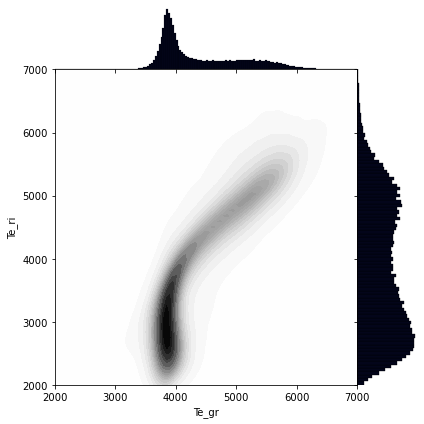

In [9]:
g = sns.JointGrid(data=gaia_x_appass, x="Te_gr", y="Te_ri", space=0, xlim=(2000,7000), ylim=(2000,7000)) #, xlim=(-5,6), ylim=(14,-2)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=20, cmap="gray_r") #,  clip=((-.1, 4.1), (14, -2))
g.plot_marginals(sns.histplot, color="#03051A", alpha=1)#, binwidth=500

(array([[2.4000e+01, 8.2600e+02, 6.6107e+04, 6.5636e+04, 5.4049e+04,
         7.6070e+03, 1.2320e+03, 2.8500e+02, 1.3300e+02, 9.2000e+01],
        [4.7200e+03, 1.9434e+04, 5.0556e+04, 7.0728e+04, 3.5732e+04,
         5.5230e+03, 1.3220e+03, 5.5800e+02, 2.6900e+02, 2.0500e+02]]),
 array([ 2000.,  2800.,  3600.,  4400.,  5200.,  6000.,  6800.,  7600.,
         8400.,  9200., 10000.]),
 <a list of 2 list[Polygon] objects>)

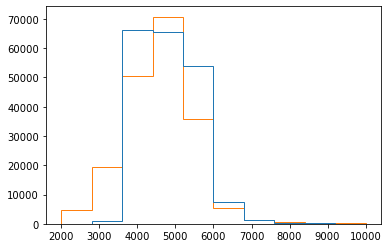

In [38]:
plt.hist(gaia_x_appass[['Te_gr','Te_ri']][gaia_x_appass.gpmag < 15.0], range=[2000,10000], histtype='step')

In [39]:
gaia_x_appass[['Te_gr','Te_ri']][gaia_x_appass.gpmag < 15.0].count()

Te_gr    196057
Te_ri    189763
dtype: int64

In [44]:
col = ['source_id','ra_x','dec_x','MG', 'Teff', 'Te_gr','Te_ri','dist_pc']

In [64]:
gaia_appass = gaia_x_appass.merge(gaia_n,'inner','source_id')[col][gaia_x_appass.gpmag < 15.0]

<AxesSubplot:>

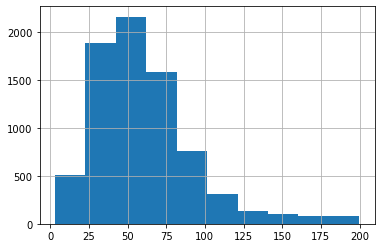

In [65]:
gaia_appass.dist_pc[gaia_appass.Te_ri < 3000].hist()

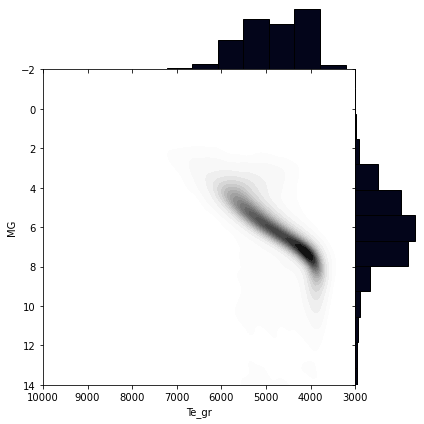

In [68]:
g = sns.JointGrid(data=gaia_appass, x="Te_gr", y="MG", space=0, xlim=(10000,3000), ylim=(14,-2)) #, xlim=(-5,6), ylim=(14,-2)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=20, cmap="gray_r") #,  clip=((-.1, 4.1), (14, -2))
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=16)

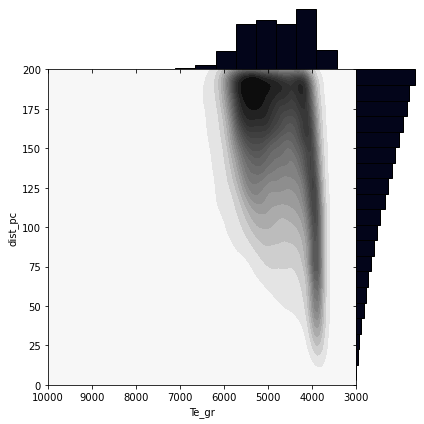

In [69]:
g = sns.JointGrid(data=gaia_appass, x="Te_gr", y="dist_pc", space=0, xlim=(10000,3000), ylim=(0,200)) #, xlim=(-5,6), ylim=(14,-2)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=20, cmap="gray_r") #,  clip=((-.1, 4.1), (14, -2))
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=20)

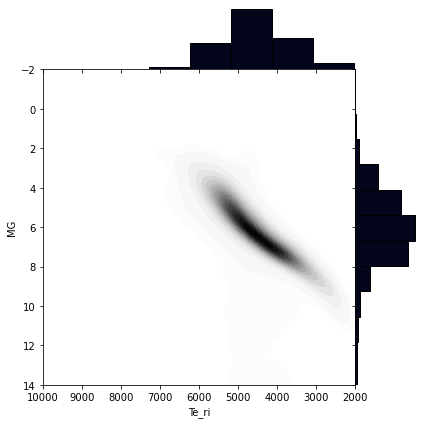

In [71]:
g = sns.JointGrid(data=gaia_appass, x="Te_ri", y="MG", space=0, xlim=(10000,2000), ylim=(14,-2)) #, xlim=(-5,6), ylim=(14,-2)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=20, cmap="gray_r") #,  clip=((-.1, 4.1), (14, -2))
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=16)

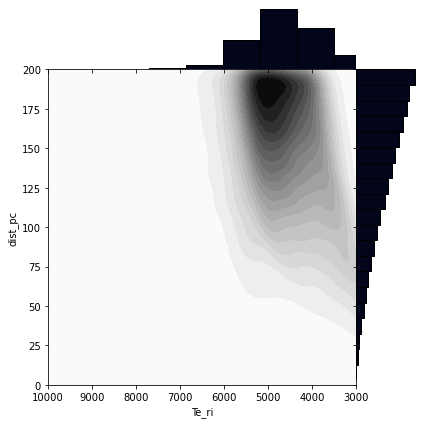

In [72]:
g = sns.JointGrid(data=gaia_appass, x="Te_ri", y="dist_pc", space=0, xlim=(10000,3000), ylim=(0,200)) #, xlim=(-5,6), ylim=(14,-2)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=20, cmap="gray_r") #,  clip=((-.1, 4.1), (14, -2))
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=20)